In [204]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from collections import Counter

### Loading Dataset

In [2]:
df = pd.read_excel('nut_data.xlsx')
df

,Data Provided By MyFoodData.com,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116
0,"Click ""File"" then ""Download as"" or ""Select All...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"If you have a google account click ""File"" then...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ID,name,Food Group,Calories,Fat (g),Protein (g),Carbohydrate (g),Sugars (g),Fiber (g),Cholesterol (mg),...,Serving Description 5 (g),Serving Weight 6 (g),Serving Description 6 (g),Serving Weight 7 (g),Serving Description 7 (g),Serving Weight 8 (g),Serving Description 8 (g),Serving Weight 9 (g),Serving Description 9 (g),200 Calorie Weight (g)
3,167512,Pillsbury Golden Layer Buttermilk Biscuits Art...,Baked Foods,307,13.24,5.88,41.18,5.88,1.2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.147
4,167513,Pillsbury Cinnamon Rolls With Icing Refrigerat...,Baked Foods,330,11.27,4.34,53.42,21.34,1.4,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14162,789766,Cheese As Ingredient In Sandwiches,NaN,359,28.73,20.65,4.57,2.4,0,90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.71
14163,789767,Breading Or Batter As Ingredient In Food,NaN,201,1.39,6.32,39.64,0.68,1.6,19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.502
14164,789768,Wheat Bread As Ingredient In Sandwiches,NaN,263,3.96,11.45,45.29,5.18,5.4,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.046
14165,789769,Sauce As Ingredient In Hamburgers,NaN,271,22.85,1.29,17.19,13.02,0.6,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.801


In [3]:
df.columns = df.loc[2].values

In [4]:
df.drop(index=[0, 1, 2], inplace=True)

In [5]:
df.reset_index(inplace=True)

In [6]:
df.drop(columns=['index', 'ID'], inplace=True)

### Dealing with Missing Values

In [7]:
df.isna()

,name,Food Group,Calories,Fat (g),Protein (g),Carbohydrate (g),Sugars (g),Fiber (g),Cholesterol (mg),Saturated Fats (g),...,Serving Description 5 (g),Serving Weight 6 (g),Serving Description 6 (g),Serving Weight 7 (g),Serving Description 7 (g),Serving Weight 8 (g),Serving Description 8 (g),Serving Weight 9 (g),Serving Description 9 (g),200 Calorie Weight (g)
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False
2,False,False,False,False,False,False,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False
3,False,False,False,False,False,False,True,True,True,False,...,True,True,True,True,True,True,True,True,True,False
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14159,False,True,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False
14160,False,True,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False
14161,False,True,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False
14162,False,True,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False


In [8]:
# Dropping columns which do not have any values

df.dropna(axis='columns', how='all', inplace = True)

In [9]:
# check number of columns that have at least 25% missing values 

count = 0
bad_features = []
for x in df.columns:
    if df[x].isna().sum() > 0.23*df.shape[0]:
        count += 1
        bad_features.append(x)
        
print(f'Number of columns that have at least 25% missing values: {count}')
print(f'Columns that have at least 25% missing values: {bad_features}')

Number of columns that have at least 25% missing values: 54
Columns that have at least 25% missing values: ['Vitamin A, IU (IU)', 'Trans Fatty Acids (g)', 'Sucrose (g)', 'Glucose (Dextrose) (g)', 'Fructose (g)', 'Lactose (g)', 'Maltose (g)', 'Galactose (g)', 'Starch (g)', 'Manganese (mg)', 'Fluoride, F (mcg)', 'Pantothenic acid (B5) (mg)', 'Betaine (mg)', 'Vitamin D2 (ergocalciferol) (mcg)', 'Vitamin D3 (cholecalciferol) (mcg)', 'Vitamin D (IU) (IU)', 'Dihydrophylloquinone (mcg)', 'Menaquinone-4 (mcg)', '18:3 n-3 c,c,c (ALA) (mg)', 'Tryptophan (mg)', 'Threonine (mg)', 'Isoleucine (mg)', 'Leucine (mg)', 'Lysine (mg)', 'Methionine (mg)', 'Cystine (mg)', 'Phenylalanine (mg)', 'Tyrosine (mg)', 'Valine (mg)', 'Arginine (mg)', 'Histidine (mg)', 'Alanine (mg)', 'Aspartic acid (mg)', 'Glutamic acid (mg)', 'Glycine (mg)', 'Proline (mg)', 'Serine (mg)', 'Hydroxyproline (mg)', 'Serving Weight 2 (g)', 'Serving Description 2 (g)', 'Serving Weight 3 (g)', 'Serving Description 3 (g)', 'Serving Weight

In [10]:
bad_features.append('name')

In [11]:
# Dropping columns that have at least 25% missing values

df = df.drop(columns=bad_features)

In [12]:
df.columns

Index(['Food Group', 'Calories', 'Fat (g)', 'Protein (g)', 'Carbohydrate (g)',
       'Sugars (g)', 'Fiber (g)', 'Cholesterol (mg)', 'Saturated Fats (g)',
       'Calcium (mg)', 'Iron, Fe (mg)', 'Potassium, K (mg)', 'Magnesium (mg)',
       'Vitamin A, RAE (mcg)', 'Vitamin C (mg)', 'Vitamin B-12 (mcg)',
       'Vitamin D (mcg)', 'Vitamin E (Alpha-Tocopherol) (mg)', 'Net-Carbs (g)',
       'Water (g)', 'Omega 3s (mg)', 'Omega 6s (mg)', 'PRAL score',
       'Phosphorus, P (mg)', 'Sodium (mg)', 'Zinc, Zn (mg)', 'Copper, Cu (mg)',
       'Selenium, Se (mcg)', 'Thiamin (B1) (mg)', 'Riboflavin (B2) (mg)',
       'Niacin (B3) (mg)', 'Vitamin B6 (mg)', 'Folate (B9) (mcg)',
       'Folic acid (mcg)', 'Food Folate (mcg)', 'Folate DFE (mcg)',
       'Choline (mg)', 'Retinol (mcg)', 'Carotene, beta (mcg)',
       'Carotene, alpha (mcg)', 'Lycopene (mcg)', 'Lutein + Zeaxanthin (mcg)',
       'Vitamin K (mcg)', 'Fatty acids, total monounsaturated (mg)',
       'Fatty acids, total polyunsaturated (mg

In [13]:
# dropping columns with description

df = df.drop(columns=['Serving Weight 1 (g)',
       'Serving Description 1 (g)'])

### Separating features and target value

In [14]:
X = df.drop(columns='Food Group')
y = df['Food Group']

df[X.columns] = df[X.columns].astype(float)

### Feature Selection

There are 55 features after eliminating columns that have more than 25% missing values. The most important features will be selected to speed up the training of model, prevent overfitting and improve the model's performance

In [15]:
# The data is first split into training and testing data before feature selection, to prevent data leakage

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
# Imputer to fill in missing values

imputed_X_train = pd.DataFrame(SimpleImputer(strategy='median').fit_transform(X_train))
imputed_X_train.columns = X_train.columns

y_train.fillna('Missing', inplace=True)

In [17]:
# Feature Selector

selector = SelectKBest(f_classif, k=20)
X_fit = selector.fit(imputed_X_train, y_train)
X_new = selector.fit_transform(imputed_X_train, y_train)

In [18]:
# Check score of each selected feature

df_scores = pd.DataFrame(X_fit.scores_)
df_columns = pd.DataFrame(X_train.columns)

feature_scores = pd.concat([df_columns, df_scores],axis=1)
feature_scores.columns = ['Feature Name','Score']

feature_scores.set_index('Feature Name', inplace=True)
feature_scores.head(20).sort_values(by='Score', ascending=False)

,Score
Feature Name,
Carbohydrate (g),791.041983
Protein (g),785.473449
Net-Carbs (g),764.654839
Water (g),577.461047
Calories,544.085554
Fat (g),440.226874
Sugars (g),312.242275
Fiber (g),295.102013
Magnesium (mg),242.070820


In [19]:
# Get back the features we've kept, zero out all other features

selected_features = pd.DataFrame(selector.inverse_transform(X_new), columns=X_train.columns)

# Dropped columns have values of all 0s, so var is 0, drop them
selected_columns = selected_features.columns[selected_features.var() != 0]
print(selected_columns)
print(selected_columns.shape)

Index(['Calories', 'Fat (g)', 'Protein (g)', 'Carbohydrate (g)', 'Sugars (g)',
       'Fiber (g)', 'Saturated Fats (g)', 'Iron, Fe (mg)', 'Magnesium (mg)',
       'Net-Carbs (g)', 'Water (g)', 'Omega 6s (mg)', 'PRAL score',
       'Selenium, Se (mcg)', 'Niacin (B3) (mg)', 'Vitamin B6 (mg)',
       'Folate (B9) (mcg)', 'Folic acid (mcg)',
       'Fatty acids, total monounsaturated (mg)',
       'Fatty acids, total polyunsaturated (mg)'],
      dtype='object')
(20,)


### Create New Dataset with relevant features

In [20]:
# Create new dataframe from original data set, but with selected features

new_df = pd.concat([df['Food Group'], df[selected_columns]], axis=1)
new_df

,Food Group,Calories,Fat (g),Protein (g),Carbohydrate (g),Sugars (g),Fiber (g),Saturated Fats (g),"Iron, Fe (mg)",Magnesium (mg),...,Water (g),Omega 6s (mg),PRAL score,"Selenium, Se (mcg)",Niacin (B3) (mg),Vitamin B6 (mg),Folate (B9) (mcg),Folic acid (mcg),"Fatty acids, total monounsaturated (mg)","Fatty acids, total polyunsaturated (mg)"
0,Baked Foods,307.0,13.24,5.88,41.18,5.88,1.2,2.941,2.12,NaN,...,35.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Baked Foods,330.0,11.27,4.34,53.42,21.34,1.4,3.250,1.93,NaN,...,27.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Baked Foods,377.0,3.70,6.10,79.80,NaN,NaN,NaN,NaN,NaN,...,3.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Baked Foods,232.0,1.80,8.00,46.00,NaN,NaN,0.308,1.40,NaN,...,42.60,841.0,NaN,NaN,NaN,NaN,40.0,NaN,303.0,920.0
4,Baked Foods,273.0,9.22,6.58,41.05,4.30,2.2,1.898,6.04,19.0,...,40.34,1414.0,10.795,9.5,6.675,0.972,63.0,49.0,4530.0,1445.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14159,NaN,359.0,28.73,20.65,4.57,2.40,0.0,16.492,0.47,29.0,...,40.73,947.0,16.051,22.7,0.100,0.077,16.0,0.0,7600.0,1191.0
14160,NaN,201.0,1.39,6.32,39.64,0.68,1.6,0.336,2.57,14.0,...,51.53,415.0,3.543,18.6,3.153,0.039,91.0,74.0,318.0,459.0
14161,NaN,263.0,3.96,11.45,45.29,5.18,5.4,0.716,3.12,56.0,...,37.06,1405.0,4.178,27.6,4.886,0.159,72.0,14.0,654.0,1560.0
14162,NaN,271.0,22.85,1.29,17.19,13.02,0.6,3.541,0.43,13.0,...,55.97,11804.0,-2.732,4.5,0.917,0.104,8.0,0.0,5280.0,13509.0


In [21]:
# Dropping rows with missing target value (Food Group)

index = new_df.loc[df['Food Group'].isnull()].index

new_df = new_df.drop(index=index)

In [22]:
# Splitting into training and test sets

X = new_df.drop(columns='Food Group')
y = new_df['Food Group']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Exploratory Data Analysis

In [24]:
new_df

,Food Group,Calories,Fat (g),Protein (g),Carbohydrate (g),Sugars (g),Fiber (g),Saturated Fats (g),"Iron, Fe (mg)",Magnesium (mg),...,Water (g),Omega 6s (mg),PRAL score,"Selenium, Se (mcg)",Niacin (B3) (mg),Vitamin B6 (mg),Folate (B9) (mcg),Folic acid (mcg),"Fatty acids, total monounsaturated (mg)","Fatty acids, total polyunsaturated (mg)"
0,Baked Foods,307.0,13.24,5.88,41.18,5.88,1.2,2.941,2.12,NaN,...,35.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Baked Foods,330.0,11.27,4.34,53.42,21.34,1.4,3.250,1.93,NaN,...,27.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Baked Foods,377.0,3.70,6.10,79.80,NaN,NaN,NaN,NaN,NaN,...,3.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Baked Foods,232.0,1.80,8.00,46.00,NaN,NaN,0.308,1.40,NaN,...,42.60,841.0,NaN,NaN,NaN,NaN,40.0,NaN,303.0,920.0
4,Baked Foods,273.0,9.22,6.58,41.05,4.30,2.2,1.898,6.04,19.0,...,40.34,1414.0,10.795,9.5,6.675,0.972,63.0,49.0,4530.0,1445.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14154,Beverages,38.0,1.15,4.78,2.10,0.38,0.2,0.104,1.15,28.0,...,91.51,114.0,0.876,3.2,1.337,0.134,27.0,27.0,809.0,118.0
14155,Beverages,58.0,2.88,6.59,0.85,0.60,0.4,0.450,0.96,44.0,...,88.33,518.0,1.637,4.5,2.390,0.208,39.0,41.0,2100.0,290.0
14156,Beverages,58.0,2.88,6.59,0.85,0.60,0.4,0.450,0.96,44.0,...,88.33,518.0,1.637,4.5,2.390,0.208,39.0,41.0,2100.0,290.0
14157,Baby Foods,380.0,0.60,35.20,58.40,2.00,37.5,0.236,2.00,7.0,...,3.95,354.0,7.783,0.0,27.650,2.800,0.0,0.0,146.0,400.0


Let's have a closer look at our target variable - Food group. Machine learning models will be trained with the features above, and used to classify our data into one of the following groups:

In [121]:
print(new_df['Food Group'].unique())

['Baked Foods' 'Snacks' 'Sweets' 'Vegetables' 'American Indian'
 'Restaurant Foods' 'Beverages' 'Fats and Oils' 'Meats'
 'Dairy and Egg Products' 'Baby Foods' 'Breakfast Cereals'
 'Soups and Sauces' 'Beans and Lentils' 'Fish' 'Fruits' 'Grains and Pasta'
 'Nuts and Seeds' 'Prepared Meals' 'Fast Foods' 'Spices and Herbs'
 'Dairy and Egg Products ']


#### Vegetables and Meats take up the majority of our target values, followed by Baked Foods, Fish, Prepared Meals, Fast Food and Beverages.

<AxesSubplot:ylabel='Food Group'>

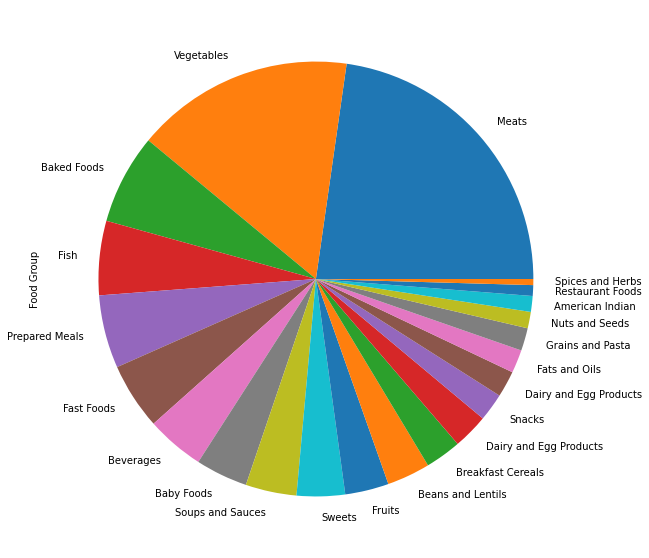

In [120]:
plt.figure(figsize=(10,10))
new_df['Food Group'].value_counts().plot(kind='pie')

##### Summary Statistics of selected features

All selected features are of numerical values, so there is no need for encoding in our preprocessing stage. However, the range of these values differ greatly, therefore scaling will be needed as the models to be used will take into account the 'distant' of each features. 

In [25]:
new_df.describe()

,Calories,Fat (g),Protein (g),Carbohydrate (g),Sugars (g),Fiber (g),Saturated Fats (g),"Iron, Fe (mg)",Magnesium (mg),Net-Carbs (g),Water (g),Omega 6s (mg),PRAL score,"Selenium, Se (mcg)",Niacin (B3) (mg),Vitamin B6 (mg),Folate (B9) (mcg),Folic acid (mcg),"Fatty acids, total monounsaturated (mg)","Fatty acids, total polyunsaturated (mg)"
count,14036.000000,14036.000000,14036.000000,14036.000000,12264.000000,13485.000000,13695.000000,13956.000000,13680.000000,14036.000000,14036.000000,13295.000000,13637.000000,13129.000000,13663.000000,13521.000000,13112.000000,12768.000000,13523.000000,13524.000000
mean,193.324210,9.145658,10.117198,18.001676,6.339585,1.837011,2.998013,1.986265,30.113743,16.236778,61.003206,1704.784731,3.232838,13.698972,2.862038,0.226251,39.315055,14.805529,3482.371072,1964.077344
std,149.599346,13.447363,9.776474,22.219769,12.359168,3.388105,5.377403,4.331201,46.038535,20.978820,26.808537,3888.201548,9.073155,24.567914,3.908723,0.343867,99.825343,79.107499,5875.283002,4280.440427
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-348.122000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,80.000000,1.620000,2.170000,2.130000,0.260000,0.000000,0.400000,0.520000,13.000000,1.420000,50.400000,174.000000,-1.294000,1.200000,0.510000,0.061000,6.000000,0.000000,445.500000,270.000000
50%,157.000000,4.800000,6.800000,9.780000,1.840000,0.900000,1.430000,1.100000,21.000000,8.225000,67.580000,611.000000,1.749000,7.700000,1.558000,0.130000,16.000000,0.000000,1697.000000,784.000000
75%,267.000000,11.802500,16.985000,22.462500,5.502500,2.300000,3.631500,2.052500,28.000000,19.722500,81.300000,1668.500000,8.763000,21.700000,4.205000,0.279000,38.000000,2.000000,4387.000000,1985.250000
max,902.000000,100.000000,88.320000,100.000000,99.800000,79.000000,95.600000,123.600000,781.000000,100.000000,100.000000,74623.000000,270.152000,1917.000000,127.500000,8.000000,3786.000000,2993.000000,83689.000000,74623.000000


#### Distribution of our top features: 

In [26]:
top = new_df.columns[1:9]
print(top)

Index(['Calories', 'Fat (g)', 'Protein (g)', 'Carbohydrate (g)', 'Sugars (g)',
       'Fiber (g)', 'Saturated Fats (g)', 'Iron, Fe (mg)'],
      dtype='object')


array([[<AxesSubplot:title={'center':'Calories'}>,
        <AxesSubplot:title={'center':'Fat (g)'}>,
        <AxesSubplot:title={'center':'Protein (g)'}>],
       [<AxesSubplot:title={'center':'Carbohydrate (g)'}>,
        <AxesSubplot:title={'center':'Sugars (g)'}>,
        <AxesSubplot:title={'center':'Fiber (g)'}>],
       [<AxesSubplot:title={'center':'Saturated Fats (g)'}>,
        <AxesSubplot:title={'center':'Iron, Fe (mg)'}>, <AxesSubplot:>]],
      dtype=object)

<Figure size 432x288 with 0 Axes>

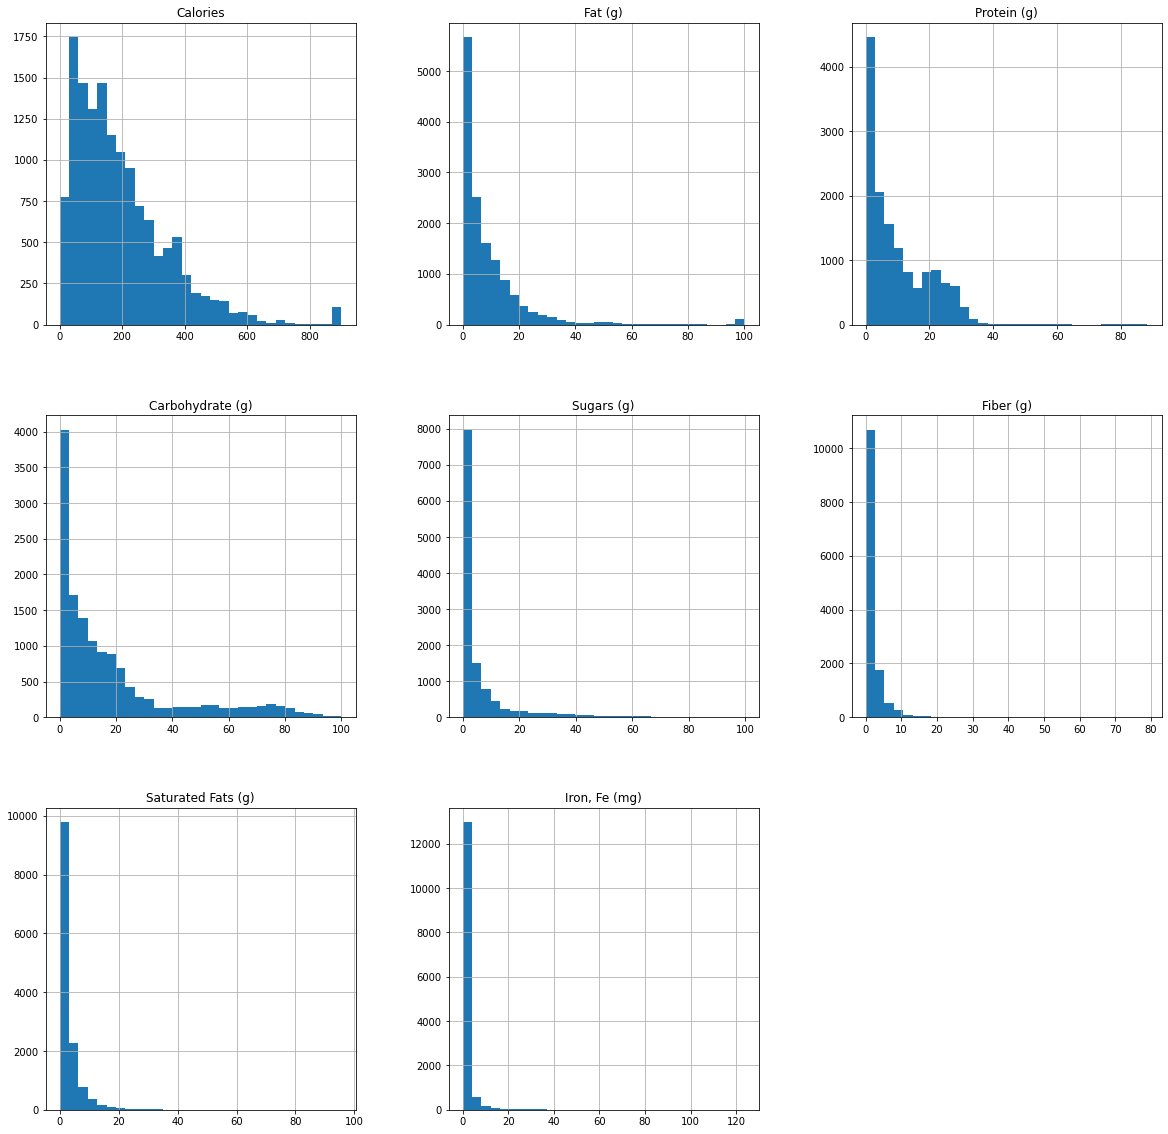

In [102]:
plt.figure()
new_df[top].hist(figsize=(20, 20), bins=30)

The following is a box plot of 'Calories' in each Food Group. 'Fats and Oils' has the highest calorie content, as well as its distribution. 'Nuts and Seeds' is relatively high in calories too. Food groups such as 'vegetables', 'beverages' and 'baby foods' have the lowest calorie content.

[Text(0, 0, 'Baked Foods'),
 Text(1, 0, 'Snacks'),
 Text(2, 0, 'Sweets'),
 Text(3, 0, 'Vegetables'),
 Text(4, 0, 'American Indian'),
 Text(5, 0, 'Restaurant Foods'),
 Text(6, 0, 'Beverages'),
 Text(7, 0, 'Fats and Oils'),
 Text(8, 0, 'Meats'),
 Text(9, 0, 'Dairy and Egg Products'),
 Text(10, 0, 'Baby Foods'),
 Text(11, 0, 'Breakfast Cereals'),
 Text(12, 0, 'Soups and Sauces'),
 Text(13, 0, 'Beans and Lentils'),
 Text(14, 0, 'Fish'),
 Text(15, 0, 'Fruits'),
 Text(16, 0, 'Grains and Pasta'),
 Text(17, 0, 'Nuts and Seeds'),
 Text(18, 0, 'Prepared Meals'),
 Text(19, 0, 'Fast Foods'),
 Text(20, 0, 'Spices and Herbs'),
 Text(21, 0, 'Dairy and Egg Products ')]

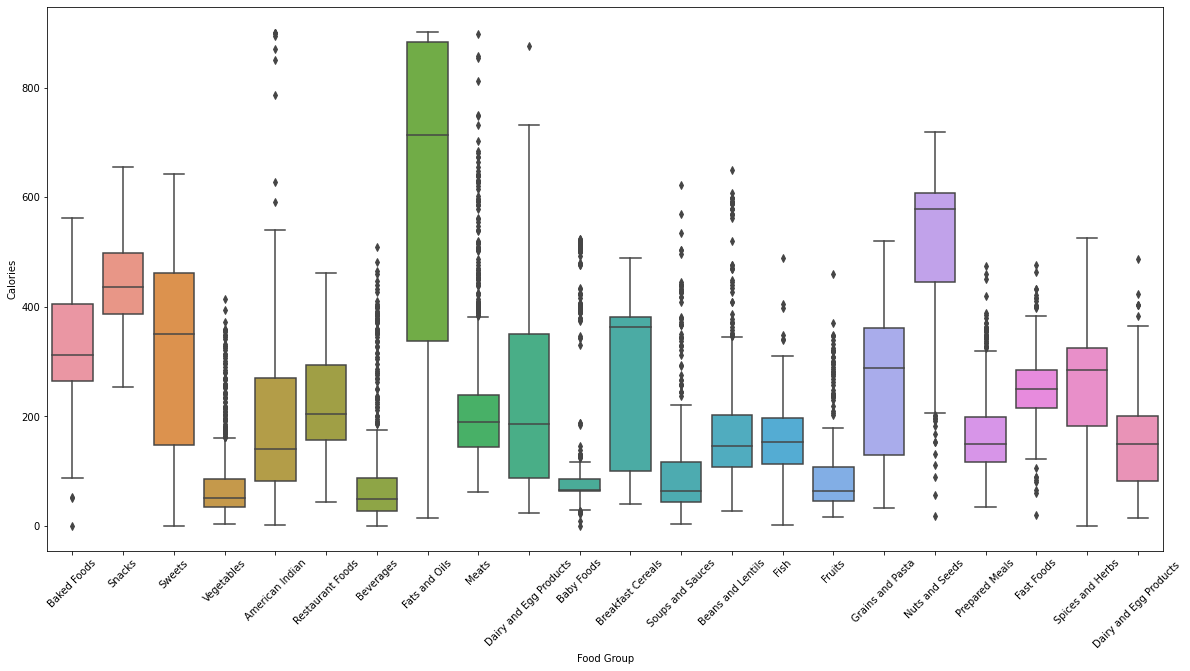

In [29]:
plt.figure(figsize=(20,10))
ax = sns.boxplot(x="Food Group", y="Calories", data=new_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

Here is a visualisation of the nutritional information of each food group.

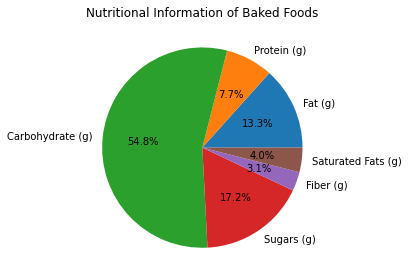

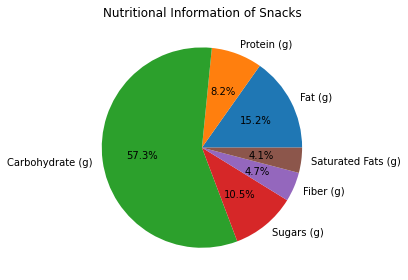

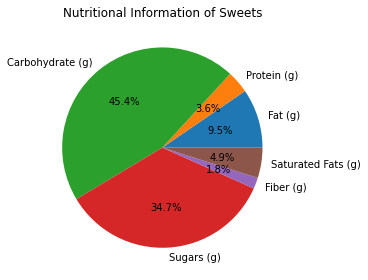

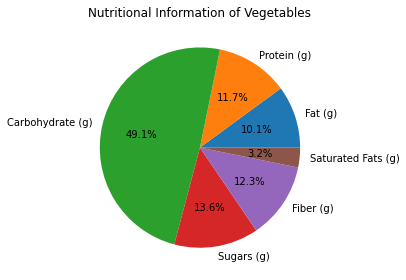

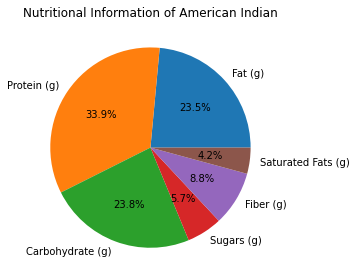

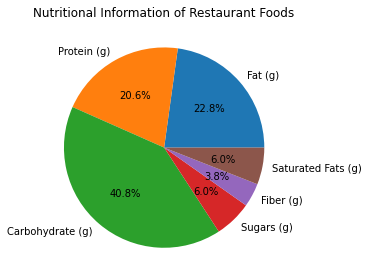

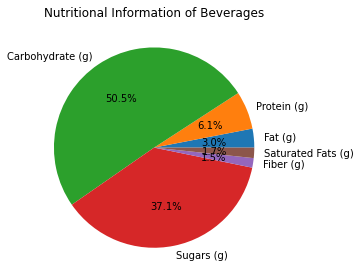

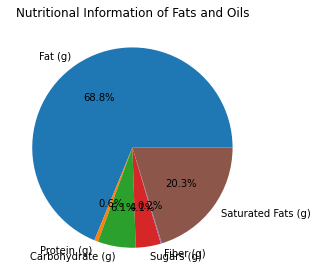

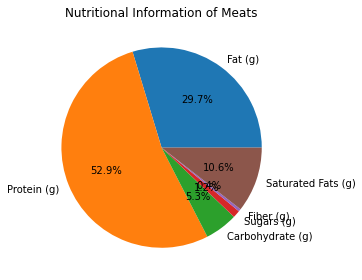

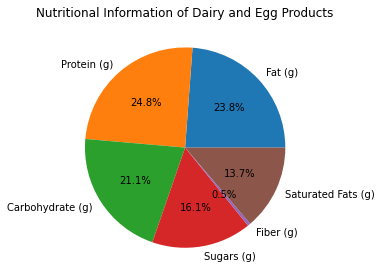

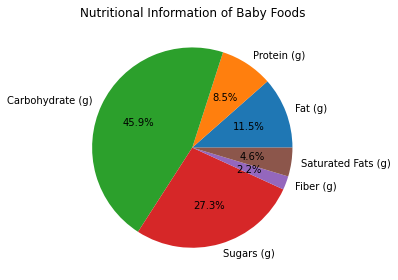

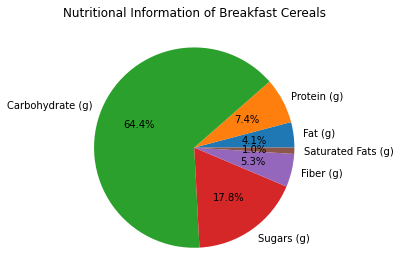

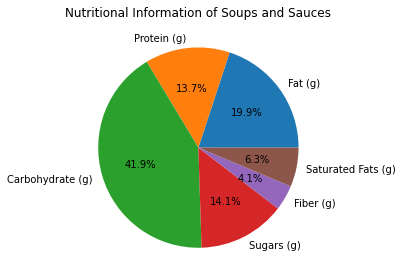

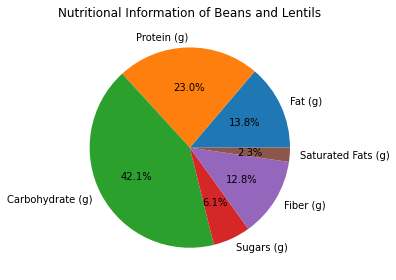

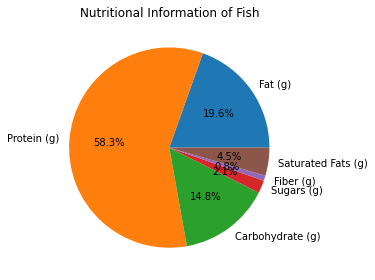

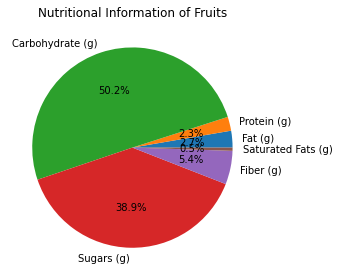

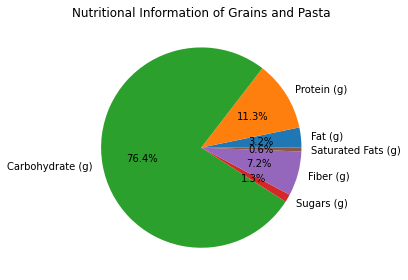

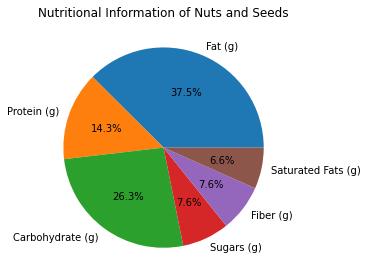

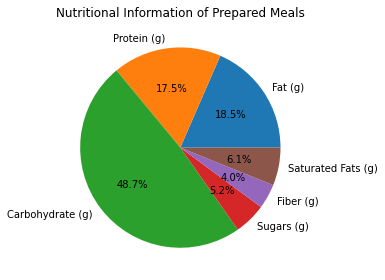

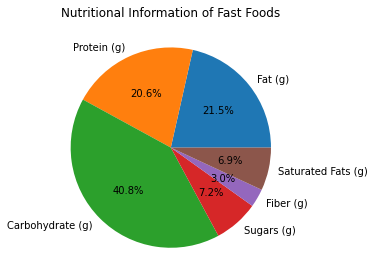

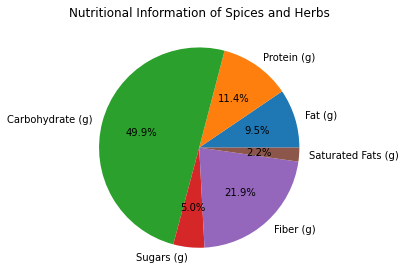

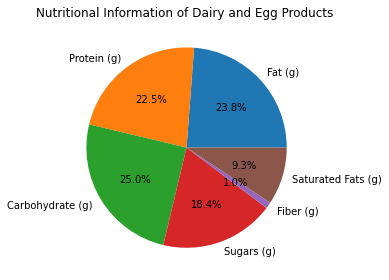

In [30]:
for group in new_df['Food Group'].unique():
    nut_info = []
    mean = []
    filt = (new_df['Food Group'] == group)
    filtered = new_df.loc[filt]
    for item in ['Fat (g)', 'Protein (g)', 'Carbohydrate (g)',
       'Sugars (g)', 'Fiber (g)', 'Saturated Fats (g)']:
        nut_info.append(item)
        mean.append(filtered[item].mean())
    
    plt.pie(mean, labels=nut_info, autopct='%1.1f%%') 
    plt.title(f'Nutritional Information of {group}')
    plt.tight_layout() 
    plt.show()

### Model Selection

The following models will be tested against our dataset in a pipeline: Stochastic Gradient Descent, Multi-Layer Perception, Naive Bayes (Gaussian), Random Firest, Decision Tree, K-Nearest Neighbours and Gradient Boosting.

In [31]:
# Setting up pipeline

# Preprocessing
process_cols = X.columns
process_t = Pipeline(steps=[
    ('Impute', SimpleImputer()), 
    ('Scaling', MinMaxScaler())])

preprocessor = ColumnTransformer(transformers=[('preprocess', process_t, process_cols)])

# Models
classifiers = [
    SGDClassifier(),
    GaussianNB(),
    RandomForestClassifier(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    GradientBoostingClassifier(),
    MLPClassifier()
]

# Pipeline

# Find out best models

models = []
scores = []
best_models = []


for model in classifiers:
    print(model)
    pipeline = Pipeline(steps=[('preprocess', preprocessor), ('m', model)])
    pipeline.fit(X_train, y_train)
    score = pipeline.score(X_test, y_test)
    print(score)
    
    models.append(model)
    scores.append(score)
    
    if score >= 0.75:
        best_models.append(model)

SGDClassifier()
0.5185185185185185
GaussianNB()
0.5715811965811965
RandomForestClassifier()
0.8767806267806267
DecisionTreeClassifier()
0.7916666666666666
KNeighborsClassifier()
0.7923789173789174
GradientBoostingClassifier()
0.8447293447293447
MLPClassifier()
0.7443019943019943


/Users/melaniecheung/Desktop/Python_Projects/Nutrition/nut_venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Models with 75% or above accuracy are:

In [34]:
best_models

[RandomForestClassifier(),
 DecisionTreeClassifier(),
 KNeighborsClassifier(),
 GradientBoostingClassifier()]

#### Performance of each model

In [103]:
models = [str(x).strip('()') for x in models]
# models

In [48]:
df_scores = pd.DataFrame(scores)
df_models = pd.DataFrame(models)

model_scores = pd.concat([df_models, df_scores],axis=1)
model_scores.columns = ['Model','Score']

model_scores.set_index('Model', inplace=True)
model_scores = model_scores.sort_values(by='Score', ascending=False)
model_scores

,Score
Model,
RandomForestClassifier,0.876781
GradientBoostingClassifier,0.844729
KNeighborsClassifier,0.792379
DecisionTreeClassifier,0.791667
MLPClassifier,0.744302
GaussianNB,0.571581
SGDClassifier,0.518519


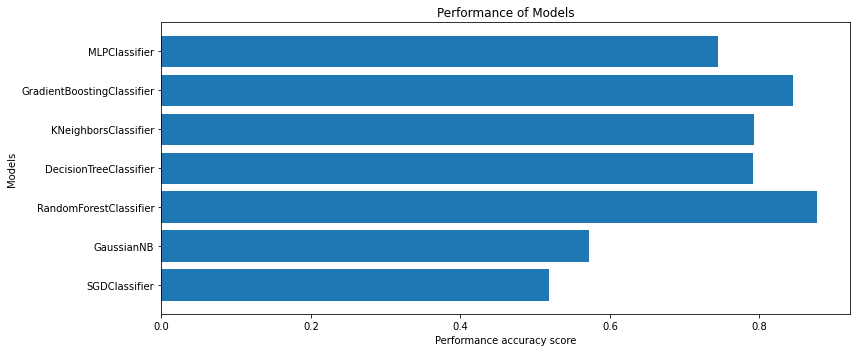

In [49]:
plt.figure(figsize=(12,5))
plt.barh(models, scores) 
plt.title('Performance of Models') 
plt.ylabel('Models') 
plt.xlabel('Performance accuracy score') 
plt.tight_layout()
plt.show()

Now we will select the best performing models (with 75% or above accuracy) for cross validation and parameter tuning

In [50]:
print(f'Models with 75% or above accuracy: {best_models}')

Models with 75% or above accuracy: [RandomForestClassifier(), DecisionTreeClassifier(), KNeighborsClassifier(), GradientBoostingClassifier()]


### Cross Validation

In [51]:
# Fill missing values

imputed_X_train = pd.DataFrame(SimpleImputer(strategy='median').fit_transform(X_train))
preprocessed_X_train = pd.DataFrame(MinMaxScaler().fit_transform(imputed_X_train))
preprocessed_X_train.columns = X_train.columns

In [61]:
# Cross Validation

cross_vali = []

for model in best_models:
    pipeline = Pipeline(steps=[('preprocess', preprocessor), ('model', model)])
    cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
    mean = cv_scores.mean()
    cross_vali.append(mean)
    print(f'Accuracy score mean of {model}: {mean}')

Accuracy score mean of RandomForestClassifier(): 0.7779985831108026
Accuracy score mean of DecisionTreeClassifier(): 0.6660719487402778
Accuracy score mean of KNeighborsClassifier(): 0.6873045053219616
Accuracy score mean of GradientBoostingClassifier(): 0.7438730453069604


In [104]:
best_models_names = [str(x).strip('()') for x in best_models]
# best_models_names
before = model_scores.loc[best_models_names]
# before

after = pd.DataFrame(cross_vali)
after_name = pd.DataFrame(best_models_names)
after = pd.concat([after_name, after], axis=1)
after.columns = ['Model', 'Score']
after.set_index('Model', inplace=True)
# after

crossval_compare = pd.concat([before, after], axis=1)
crossval_compare.columns = ['Before Cross Validation','After Cross Validation']
crossval_compare

,Before Cross Validation,After Cross Validation
Model,,
RandomForestClassifier,0.876781,0.777999
DecisionTreeClassifier,0.791667,0.666072
KNeighborsClassifier,0.792379,0.687305
GradientBoostingClassifier,0.844729,0.743873


<AxesSubplot:xlabel='Model'>

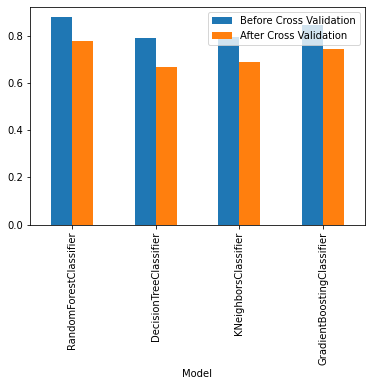

In [105]:
crossval_compare.plot(kind='bar')

As shown in the table above, scores after validation are lower. This could be due to the problem of overfitting in original model - there are 20 features in the new dataset.

### Parameter Tuning

Tuning the parameters of the four best models

In [124]:
para = [x for x in range(5, 10)]
print(para)

[5, 6, 7, 8, 9]


In [127]:
# Parameter Tuning

classifier = RandomForestClassifier()

parameter_grid = {'max_depth': para,
                  'max_features': para,
                 'criterion': ['gini', 'entropy']}

cross_validation = StratifiedKFold(n_splits=5)

grid_search = GridSearchCV(classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(preprocessed_X_train, y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.8297120146283321
Best parameters: {'criterion': 'entropy', 'max_depth': 9, 'max_features': 9}


In [129]:
classifier = DecisionTreeClassifier()

parameter_grid = {'max_depth': para,
                  'max_features': para,
                 'criterion': ['gini', 'entropy'],
                 'splitter': ['best', 'random'] }

cross_validation = StratifiedKFold(n_splits=5)

grid_search = GridSearchCV(classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(preprocessed_X_train, y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.7416293851777076
Best parameters: {'criterion': 'entropy', 'max_depth': 9, 'max_features': 8, 'splitter': 'best'}


In [130]:
classifier = KNeighborsClassifier()

parameter_grid = {'n_neighbors': para,
                  'weights': ['uniform', 'distance'],
                 'algorithm': ['ball_tree', 'kd_tree', 'brute']}

cross_validation = StratifiedKFold(n_splits=5)

grid_search = GridSearchCV(classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(preprocessed_X_train, y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.8102056415067024
Best parameters: {'algorithm': 'ball_tree', 'n_neighbors': 5, 'weights': 'distance'}


In [ ]:
classifier = GradientBoostingClassifier()

parameter_grid = {'learning_rate': [1, 0.5, 0.25, 0.1, 0.05, 0.01],
                  'n_estimators':[100,250,500,750,1000,1250,1500,1750]}

cross_validation = StratifiedKFold(n_splits=5)

grid_search = GridSearchCV(classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(preprocessed_X_train, y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

#### Putting the 'best' model to test

Now that we have found out the Random Forest Classifier is the best performing model, and the parameters that optimize its accuracy, we will use the same model but with the parameters returned to us from parameter tuning, to classify food groups based on the nutritional information available in the dataset.

In [140]:
new_df.isnull()

,Food Group,Calories,Fat (g),Protein (g),Carbohydrate (g),Sugars (g),Fiber (g),Saturated Fats (g),"Iron, Fe (mg)",Magnesium (mg),...,Water (g),Omega 6s (mg),PRAL score,"Selenium, Se (mcg)",Niacin (B3) (mg),Vitamin B6 (mg),Folate (B9) (mcg),Folic acid (mcg),"Fatty acids, total monounsaturated (mg)","Fatty acids, total polyunsaturated (mg)"
0,False,False,False,False,False,False,False,False,False,True,...,False,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,True,...,False,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,True,True,True,True,True,...,False,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,True,True,False,False,True,...,False,False,True,True,True,True,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14154,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14155,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14156,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14157,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [141]:
X = new_df.drop(columns='Food Group')
y = new_df['Food Group']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [142]:
# Preprocess training set

imputed_X_train = pd.DataFrame(SimpleImputer(strategy='mean').fit_transform(X_train))
preprocessed_X_train = pd.DataFrame(MinMaxScaler().fit_transform(imputed_X_train))
preprocessed_X_train.columns = X_train.columns

In [143]:
preprocessed_X_train

,Calories,Fat (g),Protein (g),Carbohydrate (g),Sugars (g),Fiber (g),Saturated Fats (g),"Iron, Fe (mg)",Magnesium (mg),Net-Carbs (g),Water (g),Omega 6s (mg),PRAL score,"Selenium, Se (mcg)",Niacin (B3) (mg),Vitamin B6 (mg),Folate (B9) (mcg),Folic acid (mcg),"Fatty acids, total monounsaturated (mg)","Fatty acids, total polyunsaturated (mg)"
0,0.038803,0.0038,0.033628,0.0482,0.010621,0.039241,0.000889,0.019376,0.030730,0.0172,0.9052,0.000616,0.556295,0.001587,0.003788,0.008375,0.008716,0.000000,0.000308,0.002131
1,0.444568,0.0073,0.001359,0.9855,0.954810,0.000000,0.000952,0.002339,0.003841,0.9855,0.0013,0.001983,0.557332,0.000866,0.000980,0.001875,0.000264,0.000000,0.000346,0.002801
2,0.018847,0.0024,0.007586,0.0343,0.018337,0.020253,0.000764,0.001670,0.011524,0.0183,0.9504,0.000523,0.554555,0.001010,0.001176,0.004750,0.004490,0.000000,0.000513,0.001447
3,0.092018,0.0008,0.006001,0.2147,0.199098,0.020253,0.000052,0.003341,0.008963,0.1987,0.7756,0.000201,0.558929,0.000144,0.002949,0.006750,0.000528,0.000000,0.000423,0.000201
4,0.370288,0.2414,0.307745,0.0000,0.000000,0.000000,0.100314,0.035412,0.025608,0.0000,0.4792,0.008040,0.587686,0.036075,0.019216,0.032500,0.001321,0.000000,0.133718,0.011525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11223,0.197339,0.0280,0.015285,0.3704,0.016633,0.022785,0.017490,0.002784,0.024328,0.3524,0.5756,0.001554,0.556294,0.001010,0.005875,0.009625,0.004490,0.000000,0.009333,0.001889
11224,0.103104,0.0010,0.022192,0.2155,0.017034,0.018987,0.000272,0.003898,0.032010,0.2005,0.7542,0.000429,0.553088,0.000433,0.010941,0.037625,0.002377,0.000000,0.000026,0.000576
11225,0.117517,0.0335,0.040987,0.1527,0.131062,0.006329,0.020220,0.002004,0.025608,0.1477,0.7663,0.001581,0.562383,0.005628,0.001216,0.005625,0.001321,0.000000,0.011282,0.002466
11226,0.067627,0.0220,0.062953,0.0493,0.009319,0.005063,0.004487,0.005011,0.011524,0.0453,0.8629,0.006607,0.566697,0.011544,0.014102,0.007750,0.003434,0.002339,0.010692,0.007397


In [150]:
# Preprocess test set

imputed_X_test = pd.DataFrame(SimpleImputer(strategy='mean').fit_transform(X_test))
preprocessed_X_test = pd.DataFrame(MinMaxScaler().fit_transform(imputed_X_test))
preprocessed_X_test.columns = X_test.columns

In [146]:
y_train.isnull().sum()

0

In [198]:
# Fitting the model and generating its accuracy score

classifier = RandomForestClassifier(criterion='entropy', max_depth=9, max_features=9)
classifier.fit(preprocessed_X_train, y_train)
score = classifier.score(preprocessed_X_test, y_test)
print(score)

0.7318376068376068


In [199]:
# Predicting the first 20 classes with the classifier

predictions = classifier.predict(preprocessed_X_test)
y_test = np.array(y_test)
for x in range(20):
    print(f'Prediction: {predictions[x]} ------ Actual Value: {y_test[x]}')

Prediction: Vegetables ------ Actual Value: Vegetables
Prediction: Meats ------ Actual Value: Meats
Prediction: Vegetables ------ Actual Value: Fruits
Prediction: Vegetables ------ Actual Value: Soups and Sauces
Prediction: Beans and Lentils ------ Actual Value: Prepared Meals
Prediction: Beverages ------ Actual Value: Beverages
Prediction: Vegetables ------ Actual Value: Vegetables
Prediction: Vegetables ------ Actual Value: Vegetables
Prediction: Meats ------ Actual Value: Meats
Prediction: Fast Foods ------ Actual Value: Fast Foods
Prediction: Grains and Pasta ------ Actual Value: Grains and Pasta
Prediction: Nuts and Seeds ------ Actual Value: Beans and Lentils
Prediction: Dairy and Egg Products ------ Actual Value: Dairy and Egg Products 
Prediction: Meats ------ Actual Value: Meats
Prediction: Vegetables ------ Actual Value: Vegetables
Prediction: Baked Foods ------ Actual Value: Prepared Meals
Prediction: Fast Foods ------ Actual Value: Baked Foods
Prediction: Baked Foods ------

In [203]:
pred_count = Counter(predictions)
print(pred_count)
pred_count = pd.Series(pred_count)

actual_count = Counter(y_test)
print(actual_count)
actual_count = pd.Series(actual_count)

Counter({'Meats': 769, 'Vegetables': 699, 'Baked Foods': 198, 'Fast Foods': 156, 'Beverages': 134, 'Fruits': 111, 'Beans and Lentils': 103, 'Fish': 99, 'Sweets': 76, 'Prepared Meals': 60, 'Baby Foods': 60, 'Snacks': 59, 'Breakfast Cereals': 53, 'Fats and Oils': 43, 'Soups and Sauces': 41, 'Grains and Pasta': 39, 'Dairy and Egg Products': 35, 'Nuts and Seeds': 22, 'Dairy and Egg Products ': 22, 'American Indian': 16, 'Spices and Herbs': 7, 'Restaurant Foods': 6})
Counter({'Meats': 639, 'Vegetables': 468, 'Baked Foods': 185, 'Fish': 165, 'Prepared Meals': 150, 'Fast Foods': 135, 'Beverages': 132, 'Soups and Sauces': 124, 'Baby Foods': 104, 'Beans and Lentils': 92, 'Sweets': 92, 'Fruits': 74, 'Dairy and Egg Products ': 67, 'Breakfast Cereals': 66, 'Snacks': 60, 'Fats and Oils': 54, 'Grains and Pasta': 51, 'Dairy and Egg Products': 45, 'American Indian': 38, 'Restaurant Foods': 30, 'Nuts and Seeds': 27, 'Spices and Herbs': 10})


In [201]:
# Results comparison - Counts of Prediction vs Actual classification

results_comp = pd.concat([pred_count, actual_count], axis = 'columns')
results_comp.columns = ['Prediction', 'Actual Food Group']
results_comp

,Prediction,Actual Food Group
Vegetables,699,468
Meats,769,639
Beans and Lentils,103,92
Beverages,134,132
Fast Foods,156,135
Grains and Pasta,39,51
Nuts and Seeds,22,27
Dairy and Egg Products,35,45
Baked Foods,198,185
Sweets,76,92


<AxesSubplot:>

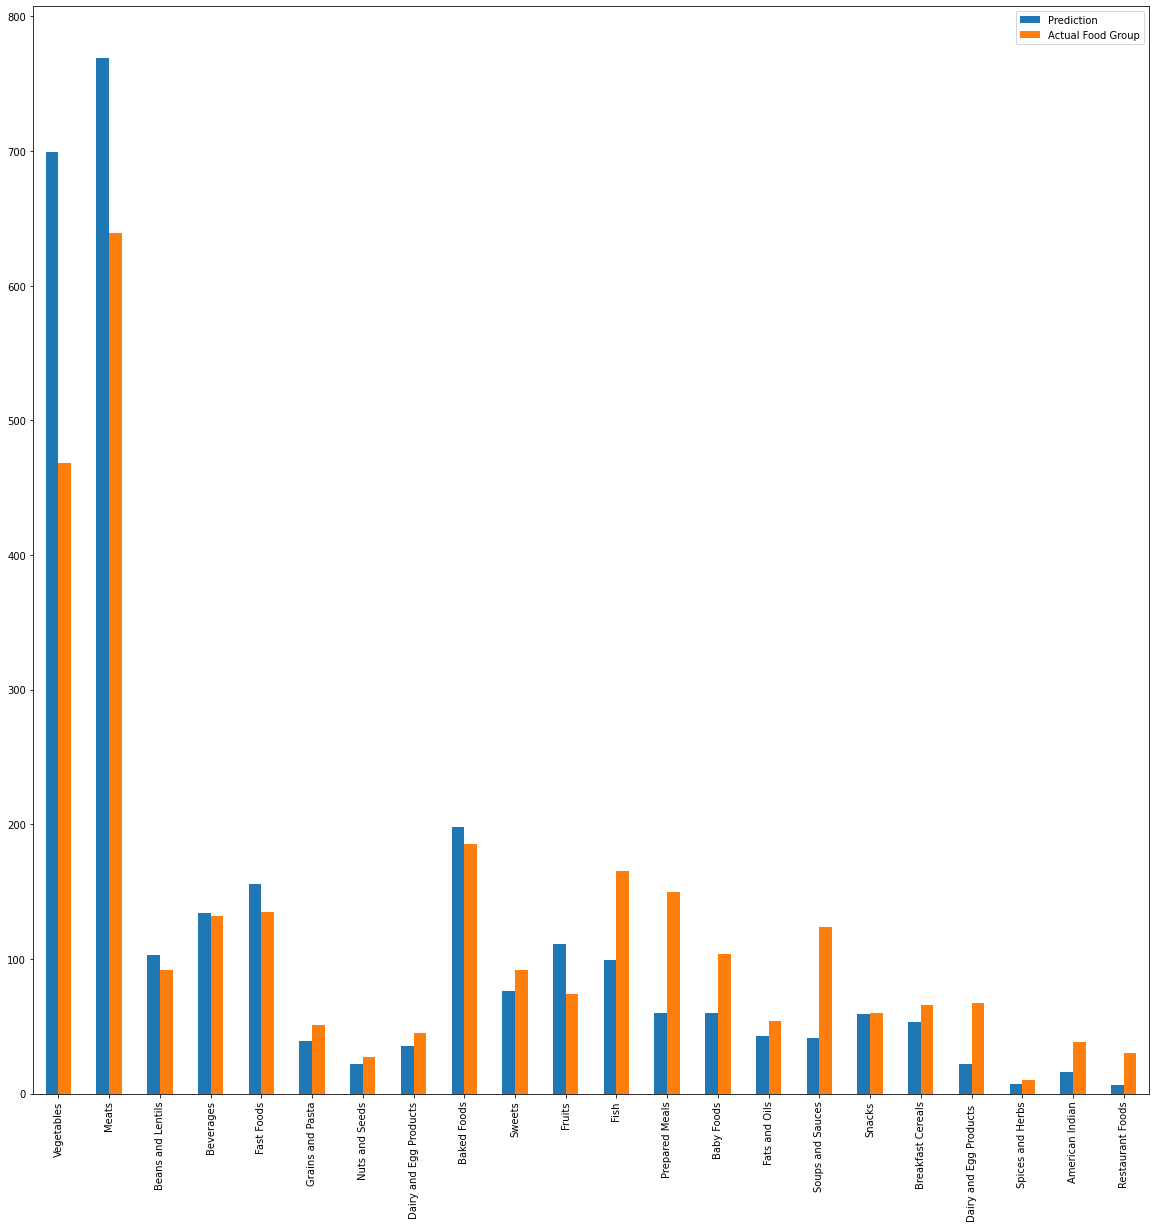

In [202]:
results_comp.plot(kind='bar', figsize=(20,20))